# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\elija\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="Bitcoin",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

7613

In [5]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="Ethereum",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]

2480

In [6]:
# Function to create a dataframe for english news and french news
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result


In [7]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_en_df = bitcoin_en_df.join(title_sentiment_df).join(text_sentiment_df)

bitcoin_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.0000,0.000,1.000,0.000,0,0.6908,0.178,0.822,0.000,1
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.8126,0.000,0.517,0.483,-1,-0.5719,0.111,0.705,0.184,-1
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,0.3182,0.247,0.753,0.000,1,-0.6124,0.000,0.857,0.143,-1
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,en,0.0000,0.000,1.000,0.000,0,0.6240,0.127,0.873,0.000,1
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,0,0.7264,0.164,0.836,0.000,1


In [8]:
# Create the Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(ethereum_news_en["articles"], "en")

# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
ethereum_en_df = ethereum_en_df.join(title_sentiment_df).join(text_sentiment_df)

ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.4703,0.253,0.747,0.000,1,0.3612,0.075,0.925,0.000,1
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.000,1,-0.2411,0.000,0.939,0.061,-1
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,0,0.7264,0.164,0.836,0.000,1
3,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,2021-08-05,en,0.0000,0.000,1.000,0.000,0,0.6956,0.190,0.810,0.000,1
4,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,2021-08-05,en,-0.2960,0.000,0.761,0.239,-1,0.0000,0.000,1.000,0.000,0


In [9]:
# Describe the Bitcoin Sentiment
bitcoin_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,-0.057905,0.045750,0.875750,0.078500,-0.100000,-0.019345,0.058500,0.881750,0.059750,0.050000
std,0.263197,0.099279,0.175543,0.135392,0.640723,0.484055,0.058633,0.101771,0.090311,0.887041
min,-0.812600,0.000000,0.458000,0.000000,-1.000000,-0.827100,0.000000,0.653000,0.000000,-1.000000
25%,-0.056575,0.000000,0.760500,0.000000,-0.250000,-0.405525,0.000000,0.836000,0.000000,-1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.056000,0.906000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.194750,0.000000,0.315000,0.092500,0.940000,0.088250,1.000000
max,0.433600,0.328000,1.000000,0.483000,1.000000,0.726400,0.178000,1.000000,0.287000,1.000000


In [10]:
# Describe the Ethereum Sentiment
ethereum_en_df.describe()

,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000,20.000000,20.00000,20.00000,20.000000
mean,0.115095,0.083150,0.88895,0.027900,0.25000,0.244345,0.073250,0.91330,0.01345,0.400000
std,0.254059,0.119263,0.11977,0.070747,0.71635,0.344475,0.079278,0.08322,0.02766,0.680557
min,-0.296000,0.000000,0.62100,0.000000,-1.00000,-0.340000,0.000000,0.78200,0.00000,-1.000000
25%,0.000000,0.000000,0.79700,0.000000,0.00000,0.000000,0.000000,0.84050,0.00000,0.000000
50%,0.000000,0.000000,0.90900,0.000000,0.00000,0.125000,0.037500,0.92650,0.00000,0.500000
75%,0.270200,0.178250,1.00000,0.000000,1.00000,0.557175,0.151750,1.00000,0.00000,1.000000
max,0.670500,0.379000,1.00000,0.239000,1.00000,0.771700,0.194000,1.00000,0.07200,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum at 0.4

Q: Which coin had the highest compound score?

A: Ethereum at 0.77

Q. Which coin had the highest positive score?

A: Ethereum at 0.379

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of stopwords
    sw = set(stopwords.words('english'))
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    # Remove the stop words
    token = [word.lower() for word in lem if word.lower() not in sw]
    
    return token

In [14]:
# Create a new tokens column for Bitcoin
bitcoin_en_df['tokens'] = bitcoin_en_df['text'].apply(tokenizer)
bitcoin_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,Why Not Use Self-Driving Cars as Supercomputers?,Autonomous vehicles use the equivalent of 200 ...,"Like Dogecoin devotees, the mayor of Reno, and...",2021-07-19,en,0.0000,0.000,1.000,0.000,0,0.6908,0.178,0.822,0.000,1,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,Kaseya ransomware attackers demand $70 million...,Three days after ransomware attackers hijacked...,Filed under:\r\nThe supply chain attack has re...,2021-07-05,en,-0.8126,0.000,0.517,0.483,-1,-0.5719,0.111,0.705,0.184,-1,"[filed, underthe, supply, chain, attack, ha, r..."
2,Gang behind huge cyber-attack demands $70m in ...,"The authors of a ""colossal"" ransomware attack ...",image copyrightGetty Images\r\nThe gang behind...,2021-07-05,en,0.3182,0.247,0.753,0.000,1,-0.6124,0.000,0.857,0.143,-1,"[image, copyrightgetty, imagesthe, gang, behin..."
3,Daily Crunch: Bitcoin ‘is a big part of our fu...,"Hello friends and welcome to Daily Crunch, bri...",To get a roundup of TechCrunchs biggest and mo...,2021-07-23,en,0.0000,0.000,1.000,0.000,0,0.6240,0.127,0.873,0.000,1,"[get, roundup, techcrunchs, biggest, important..."
4,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,0,0.7264,0.164,0.836,0.000,1,"[retail, investor, grew, comfortable, buying, ..."


In [15]:
# Create a new tokens column for Ethereum
ethereum_en_df['tokens'] = ethereum_en_df['text'].apply(tokenizer)
ethereum_en_df.head()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent,tokens
0,"Crypto investors like Terraform Labs so much, ...",There are many blockchain platforms competing ...,There are many blockchain platforms competing ...,2021-07-16,en,0.4703,0.253,0.747,0.000,1,0.3612,0.075,0.925,0.000,1,"[many, blockchain, platform, competing, invest..."
1,Tenderly raises $15.3M to help Ethereum develo...,Blockchain infrastructure startups are heating...,Blockchain infrastructure startups are heating...,2021-07-29,en,0.6705,0.379,0.621,0.000,1,-0.2411,0.000,0.939,0.061,-1,"[blockchain, infrastructure, startup, heating,..."
2,Crypto startup Phantom banks funding from Andr...,While retail investors grew more comfortable b...,While retail investors grew more comfortable b...,2021-07-14,en,0.0000,0.000,1.000,0.000,0,0.7264,0.164,0.836,0.000,1,"[retail, investor, grew, comfortable, buying, ..."
3,"Cent, the platform that Jack Dorsey used to se...",Cent was founded in 2017 as an ad-free creator...,Cent was founded in 2017 as an ad-free creator...,2021-08-05,en,0.0000,0.000,1.000,0.000,0,0.6956,0.190,0.810,0.000,1,"[cent, wa, founded, adfree, creator, network, ..."
4,Ethereum major upgrade activated; ether stays ...,"A major software upgrade on Ethereum, the seco...",Representation of the Ethereum virtual currenc...,2021-08-05,en,-0.2960,0.000,0.761,0.239,-1,0.0000,0.000,1.000,0.000,0,"[representation, ethereum, virtual, currency, ..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
bitcoin_n_grams = tokenizer(''.join(
    str(bitcoin_en_df
        ['text'].tolist()
       )))
bitcoin_article = Counter(ngrams(bitcoin_n_grams, n=2))
print(dict(bitcoin_article))

{('like', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'char'): 1, ('char', 'filed'): 1, ('filed', 'underrnthe'): 1, ('underrnthe', 'supply'): 1, ('supply', 'chain'): 1, ('chain', 'attack'): 1, ('attack', 'ha'): 2, ('ha', 'reached'): 1, ('reached', 'thousand'): 1, ('thousand', 'organizationsrnillustration'): 1, ('organizationsrnillustration', 'alex'): 1, ('alex', 'castro'): 1, ('castro', 'vergernthree'): 1, ('vergernthree', 'day'): 1, ('day', 'ransomware'): 1, ('ransomware', 'attacker'): 1, ('attacker', 'started'): 1, ('started', 'holiday'): 1, (

In [18]:
# Generate the Ethereum N-grams where N=2
ethereum_n_grams = tokenizer(''.join(
    str(ethereum_en_df
        ['text'].tolist()
       )))
ethereum_article = Counter(ngrams(ethereum_n_grams, n=2))
print(dict(ethereum_article))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'char'): 1, ('char', 'blockchain'): 1, ('blockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypto', 'char'): 1, ('ch

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
token_count(bitcoin_n_grams, N=10)

[('char', 19),
 ('bitcoin', 11),
 ('attack', 7),
 ('reuters', 6),
 ('reutersdado', 6),
 ('july', 5),
 ('illustration', 5),
 ('taken', 5),
 ('ha', 4),
 ('ransomware', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
token_count(ethereum_n_grams, N=10)

[('char', 20),
 ('ethereum', 17),
 ('network', 5),
 ('cryptocurrency', 5),
 ('blockchain', 4),
 ('platform', 4),
 ('like', 4),
 ('cryptocurrencies', 4),
 ('ha', 4),
 ('reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [23]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

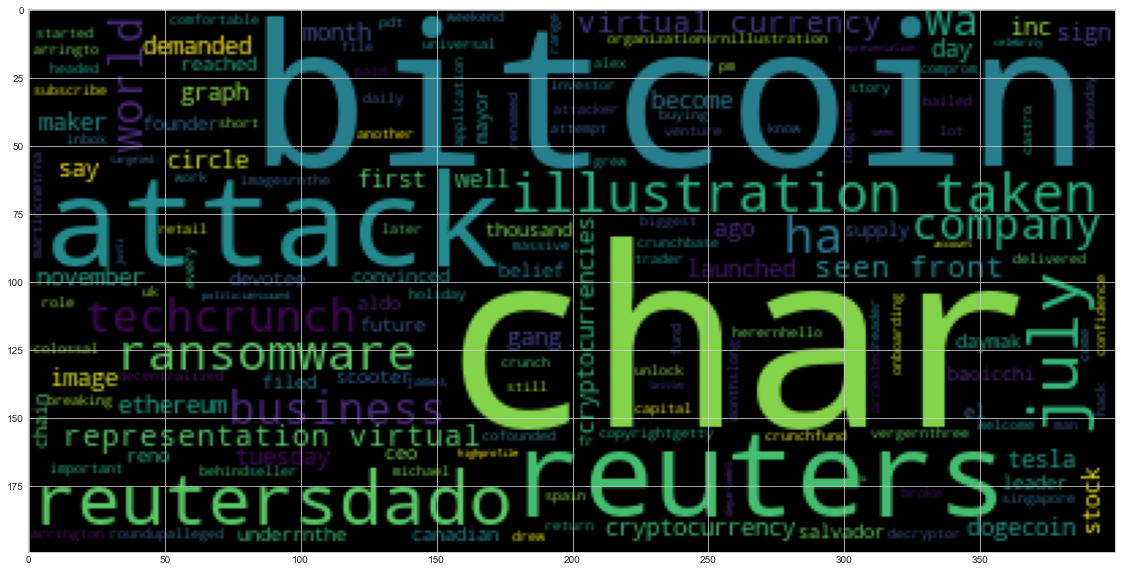

In [24]:
# Generate the Bitcoin word cloud
bitcoin_join = ' '.join(bitcoin_n_grams)
btc_words = process_text(bitcoin_join)
wc = WordCloud().generate(btc_words)
plt.imshow(wc)

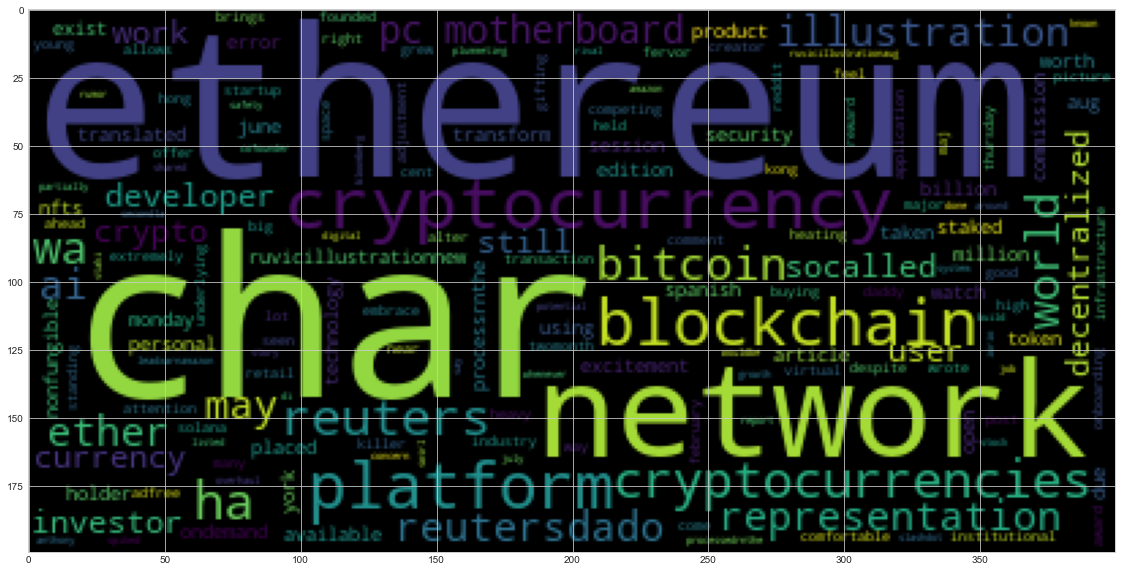

In [25]:
# Generate the Ethereum word cloud
ethereum_join = ' '.join(ethereum_n_grams)
eth_words = process_text(ethereum_join)
wc = WordCloud().generate(eth_words)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
btc_combined = str(bitcoin_en_df['text'].tolist())

In [30]:
# Run the NER processor on all of the text
btc_spcy = nlp(btc_combined)

# Add a title to the document
btc_spcy.user_data["title"] = "Spacy Visualization for BTC"

In [31]:
# Render the visualization
displacy.render(btc_spcy, style='ent')

In [32]:
# List all Entities
[print(ent.text, ent.label_) for ent in btc_spcy.ents]

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Alex Castro PERSON
Verge\r\nThree days DATE
the holiday weekend DATE
$70m MONEY
£50.5m MONEY
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
James Martin PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration\r\nSINGAPORE PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
Ju PERSON
REUTERS ORG
Dado Ruvic PERSON
10 CARDINAL
the Opening Bell ORG
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
REUTERS ORG
Dado GPE
Reuters ORG
Tesla Inc ORG


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
eth_combined = str(ethereum_en_df['text'].tolist())

In [34]:
# Run the NER processor on all of the text
eth_spcy = nlp(eth_combined)

# Add a title to the document
eth_spcy.user_data["title"] = "Spacy Visualization for ETH"

In [35]:
# Render the visualization
displacy.render(eth_spcy, style='ent')

In [36]:
# List all Entities
[print(ent.text, ent.label_) for ent in eth_spcy.ents]

Ethereum PERSON
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum PERSON
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Anthony Di Iorio PERSON
Ethereum PERSON
Bloomberg PERSON
Slashdot NORP
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
more than $13 billion MONEY
2.0 CARDINAL
Getty PERSON
more than $13 billion MONEY
2.0 CARDINAL
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
this process.\r\nThe Securities and Exchange Commission ORG
London GPE
Ethereum PERSON
12 965 000 CARDINAL
August 3-5 D

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

---